#### Obtain Data from investing.com from Jan 2021 to July 2021 

In [1]:
import investpy

data = investpy.get_crypto_historical_data(crypto='bitcoin',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')

data1 = investpy.get_crypto_historical_data(crypto='dogecoin',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')

data2 = investpy.get_crypto_historical_data(crypto='ethereum',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')

data3 = investpy.get_crypto_historical_data(crypto='tether',
                                           from_date='01/01/2021',
                                           to_date='31/07/2021')

#### Obtain Exact Closing Prices

In [8]:
import pandas as pd
df = pd.DataFrame({'BTC': data.Close,
                   'DOG': data1.Close,
                   'ETH': data2.Close,
                   'USDT': data3.Close})
df.head()

,BTC,DOG,ETH,USDT
Date,,,,
2021-01-01,29359.9,0.005661,729.12,1.0018
2021-01-02,32193.3,0.010489,774.50,1.0003
2021-01-03,32958.9,0.009850,974.97,1.0000
2021-01-04,32022.6,0.009780,1042.40,1.0000
2021-01-05,33991.5,0.009958,1099.52,1.0019


### Visualize Relative Changes of Closing Prices

**Observation**
Whenever the Market for BTC and DOGE rises, USDT will decrease and vice versa

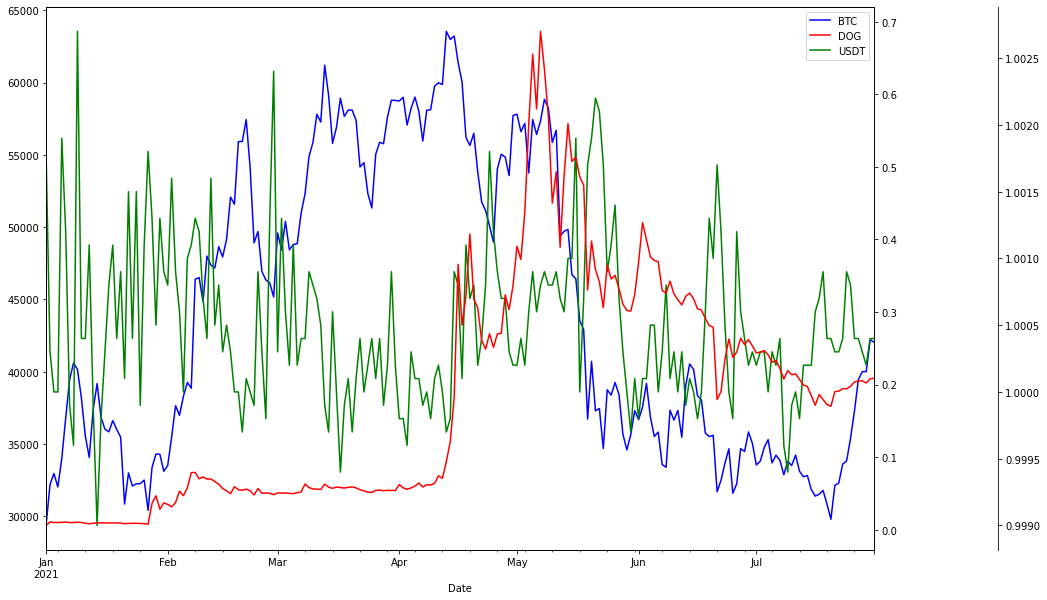

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

#df['BTC'].plot(ax=ax1, style='b-')
#df['DOG'].plot(ax=ax2, style='g-')
df['BTC'].plot(ax=ax1, style='b-')
df['DOG'].plot(ax=ax1, style='r-', secondary_y=True)
df['USDT'].plot(ax=ax2, style='g-')

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC','DOG','USDT'])

### Measure Correlation of Closing Prices

Pearson Correaltion is calculated on the Closign Prices of BTC, ETH, DOGE and USDT.

**Definition** - Pearson correlation is a measure of the linear correlation between two variables X and Y. 
It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

**Observations**
- Corelation matrix is symetric so only the lower half is shown. 
- DOGE and ETH were highly correlated in past 7 months. This means, when DOGE closing price increased ETH also followed the same. 
- DOGE and ETH were highly correlated with 0.9065 Pearson correlation coefficient.
- BTC, DOGE and ETH usually have low correlation on the market and is shows the same in the visualization
- Everytime, it is said that when the Market for BTC, DOGE, ETH rises, USDT will decrease. Hence the correlation cannot be mapped due to this inverse market trend

<AxesSubplot:>

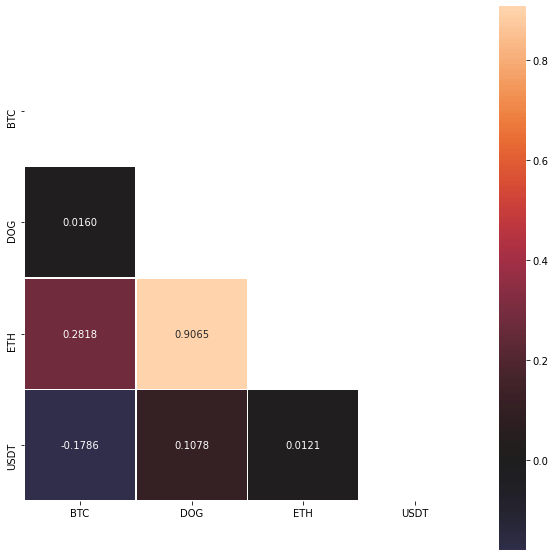

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

### Visualize Returns from 7 months

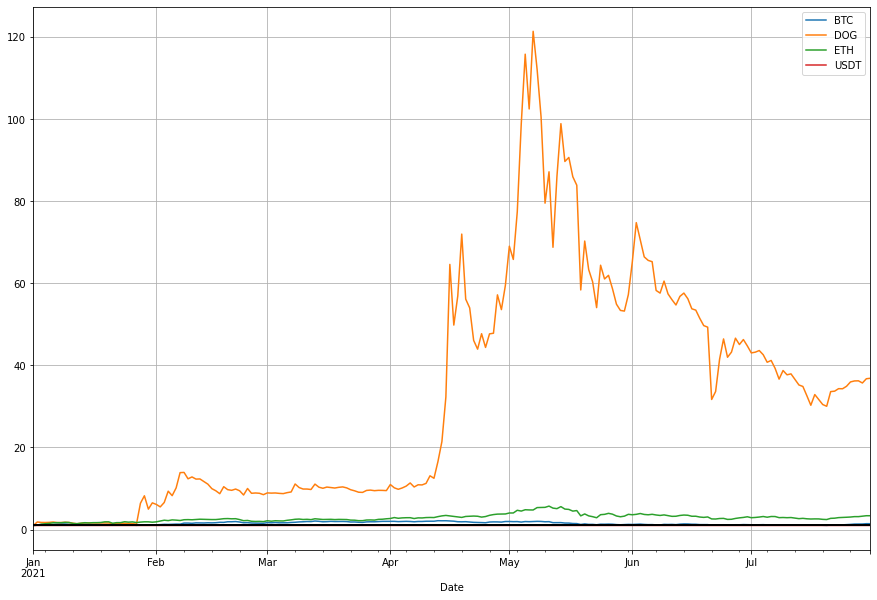

In [11]:
df_return = df.apply(lambda x: x / x[0])
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

### Percentage Increase

,BTC,DOG,ETH,USDT
Date,,,,
2021-07-31,143.186455,3684.737679,337.397136,99.860252


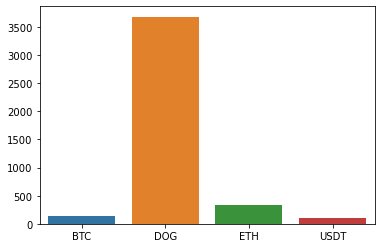

In [12]:
df_perc = df_return.tail(1) * 100
ax = sns.barplot(data=df_perc)
df_perc

### How many coins could have been bought for $2000? 

,BTC,DOG,ETH,USDT
Date,,,,
2021-01-01,0.06812,353294.470942,2.743033,1996.406468


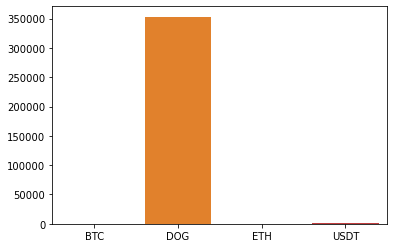

In [18]:
budget = 2000 # USD
df_coins = budget/df.head(1)

ax = sns.barplot(data=df_coins)
df_coins

### How much money could have been made? 

,BTC,DOG,ETH,USDT
Date,,,,
2021-07-31,1431.86455,36847.376789,3373.971363,998.602515


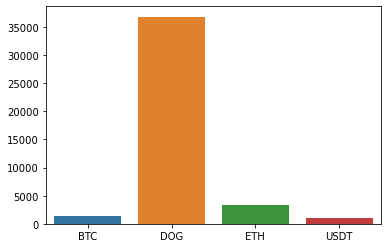

In [14]:
df_profit = df_return.tail(1) * budget

ax = sns.barplot(data=df_profit)
df_profit